In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import os
import tensorflow as tf
import cv2

In [2]:
def load_img(img_path, img_size):
    image = tf.keras.preprocessing.image.load_img(img_path,
                                              color_mode = "grayscale",
                                              target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array /= 255
    return image, img_array

def get_rect(img, human_box_list):
    img = img.copy()
    for box in human_box_list:
        img = cv2.rectangle(img, (int(box[0]), int(box[1])),
                           (int(box[2]), int(box[3])), 
                            (0, 255, 255), 1)
    plt.imshow(img, cmap='gray')
    plt.show()

In [13]:
ep26_bg = pd.read_csv('testing_files\epochs_data4\csv_conf_without_iou\\m32_ep26_k0\\output_m32_ep26_k0_bg.csv')
ep26_tp = pd.read_csv('testing_files\epochs_data4\csv_conf_without_iou\\m32_ep26_k0\\output_m32_ep26_k0_tp.csv')
ep2458_bg = pd.read_csv('testing_files\epochs_data4\csv_conf_without_iou\\m32_ep2458_k0\\output_m32_ep2458_k0_bg.csv')
ep2458_tp = pd.read_csv('testing_files\epochs_data4\csv_conf_without_iou\\m32_ep2458_k0\\output_m32_ep2458_k0_tp.csv')

In [4]:
ep154_bg.columns

Index(['Unnamed: 0', 'img_name', 'max_conf', 'iou', 'box'], dtype='object')

In [14]:
ep26_bg[ep26_bg['max_conf'] == 1]

,Unnamed: 0,img_name,max_conf,iou,box
166,166,1153.jpg,1.0,-,[ 8.18692112 4.24539948 19.6443634 22.9708271 ]


In [15]:
ep2458_bg[ep2458_bg['max_conf'] == 1]

,Unnamed: 0,img_name,max_conf,iou,box
7,7,1005.jpg,1.0,-,[ 2.88257933 2.87500668 15.84739685 25.74262238]
33,33,103.jpg,1.0,-,[ 5.09284163 7.3421545 14.46753693 25.61824036]
44,44,104.jpg,1.0,-,[ 2.66287327 5.63432026 14.07943821 27.38043594]
50,50,1045.jpg,1.0,-,[15.84656334 4.85692692 31.72728157 29.05963898]
53,53,1048.jpg,1.0,-,[11.01483727 1.39234352 26.45318031 23.82020569]
...,...,...,...,...,...
437,437,697.jpg,1.0,-,[ 7.52514744 2.50610065 21.05117798 24.86889648]
440,440,70.jpg,1.0,-,[ 4.90817928 9.82861328 16.58474731 30.80257034]
473,473,74.jpg,1.0,-,[ 6.50064754 1.08687401 23.56201935 25.92829323]
490,490,755.jpg,1.0,-,[ 1.00944138 -0.17756939 12.91527176 21.19649506]


In [22]:
ep26_tp[ep26_tp['max_conf'] != 1.0]

,Unnamed: 0,img_name,max_conf,iou,box
39,39,n6_0_10_0.jpg,1.000000,0.839450,"[3.8736438751220703, 1.5926246643066406, 29.19..."
44,44,n6_0_40_1.jpg,0.999999,0.625630,"[12.427267074584961, 4.467400550842285, 29.462..."
138,138,n7_0_10_0.jpg,1.000000,0.699353,"[4.628095626831055, 3.961880683898926, 24.8901..."
140,140,n7_0_30_1.jpg,0.999996,0.822784,"[12.19814682006836, 1.453740119934082, 30.2447..."
143,143,n7_0_40_1.jpg,1.000000,0.797935,"[15.655723571777344, 8.127349853515625, 30.358..."
239,239,n8_0_30_1.jpg,1.000000,0.840521,"[14.178430557250977, 3.05905818939209, 30.7587..."
345,345,v8_0_0_10_0.jpg,1.000000,0.759700,"[6.008577346801758, 2.222085952758789, 25.5227..."
351,351,v8_0_0_40_2.jpg,0.999965,0.498667,"[14.341772079467773, 1.3873624801635742, 27.91..."
352,352,v8_0_0_40_3.jpg,1.000000,0.388079,"[-4.727688312530518, -2.6258668899536133, 9.19..."
353,353,v8_0_0_40_4.jpg,0.999998,0.535702,"[5.632124900817871, 6.601318359375, 20.8827819..."


In [ ]:
ep26_tp[ep26_tp['max_conf'] != 1.0]ep26_tp['max_conf'] > 0.75

In [17]:
ep2458_tp['max_conf'][ep2458_tp['max_conf'] == 1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
522    1.0
523    1.0
524    1.0
525    1.0
526    1.0
Name: max_conf, Length: 523, dtype: float64

In [27]:
def str_to_list(box_str):
    out_list = []    
    for a in box_str[1:-1].split(','):
        if a == '':
            continue
        else:
            out_list.append(float(a))
    return out_list

def visualise_shit(df, img_dir):
    for i in range(len(df)):
        img_name = dif.loc[i][]i
        box_str = idf.loc[i]4          iprint(box_str)
        box = str_to_list(box_s  
        img_path = os.path.join(img_dir, img_name) 
           _, img_array = load_img(img_p32(632 64)at        ge,64)t_rect(img_array, [box])

[17.66720962524414, 8.753076553344727, 44.46364974975586, 53.38237762451172]


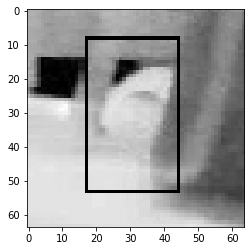

[17.816959381103516, 10.342901229858398, 55.79228591918945, 64.2753677368164]


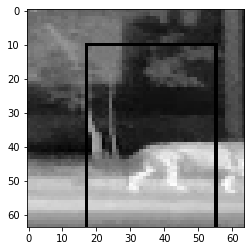

[14.246892929077148, 8.882492065429688, 65.91911315917969, 64.22846221923828]


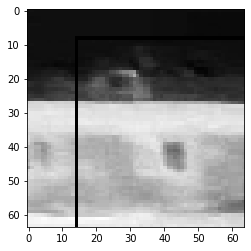

[11.678892135620117, 5.661914825439453, 50.581817626953125, 57.34486770629883]


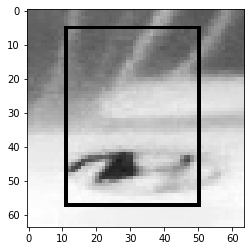

[17.88791275024414, 8.443843841552734, 58.1381950378418, 62.66855239868164]


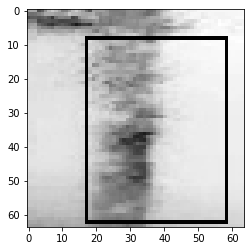

[29.378665924072266, 16.365510940551758, 62.80290603637695, 66.85491943359375]


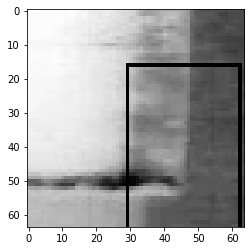

[26.520687103271484, 11.617889404296875, 57.1200065612793, 55.26750183105469]


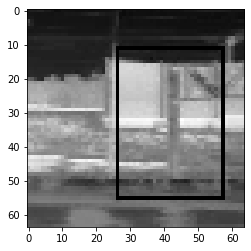

[27.2192325592041, 8.702585220336914, 60.563812255859375, 45.725990295410156]


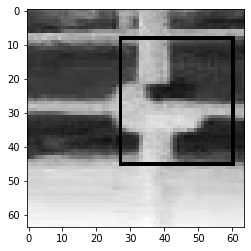

[10.03837776184082, 5.511030197143555, 45.618125915527344, 53.75700378417969]


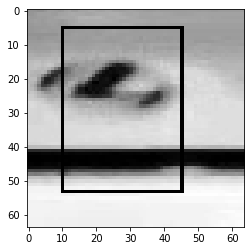

[0.10756492614746094, 26.15679168701172, 17.092714309692383, 64.30535125732422]


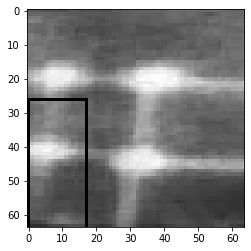

[2.4190454483032227, 1.8402843475341797, 32.348167419433594, 48.26380920410156]


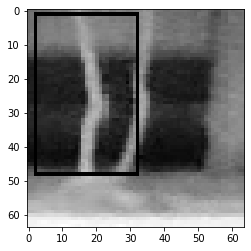

[8.884281158447266, 9.966537475585938, 37.275142669677734, 54.48072814941406]


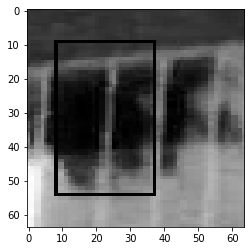

[23.96903419494629, 14.102516174316406, 47.553367614746094, 50.86909484863281]


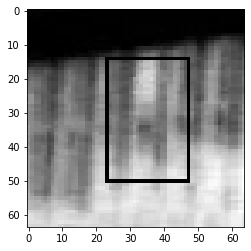

[1.8480215072631836, 0.8852767944335938, 29.147533416748047, 46.00847625732422]


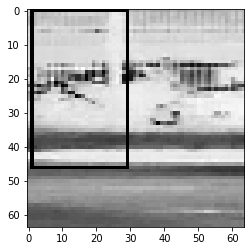

[30.925777435302734, 15.95435905456543, 61.01839065551758, 67.90015411376953]


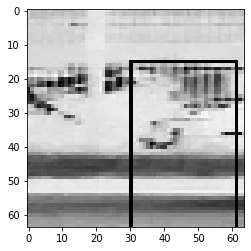

[9.540233612060547, 6.700788497924805, 51.437015533447266, 59.419456481933594]


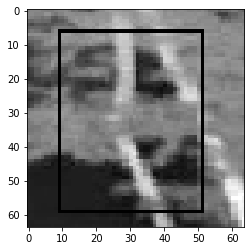

[26.35251808166504, 14.55494499206543, 58.857383728027344, 66.98085021972656]


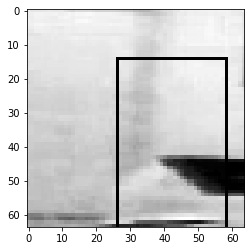

[30.064682006835938, 6.849575042724609, 60.551116943359375, 57.83267593383789]


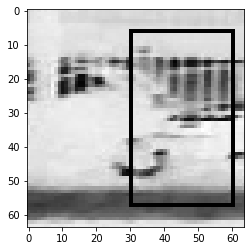

[15.480154037475586, 8.41118049621582, 47.85264587402344, 53.559303283691406]


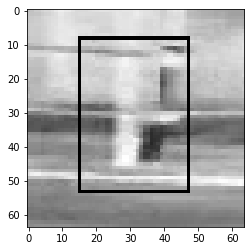

[13.458768844604492, 4.932193756103516, 48.63780975341797, 56.524078369140625]


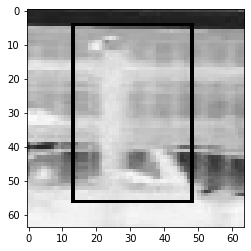

[16.017004013061523, 4.722858428955078, 50.25482177734375, 53.527191162109375]


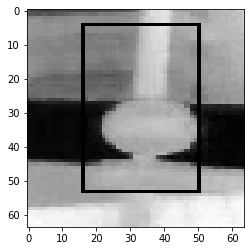

[17.997514724731445, 18.9891357421875, 46.42362976074219, 63.94207763671875]


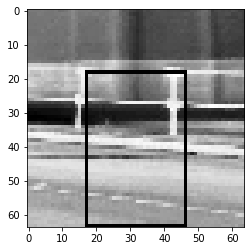

[12.338647842407227, 4.752838134765625, 48.82488250732422, 56.67704391479492]


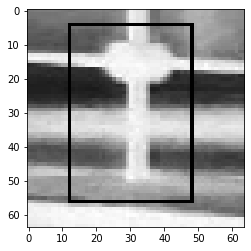

[21.975034713745117, 7.362926483154297, 67.89071655273438, 60.1561164855957]


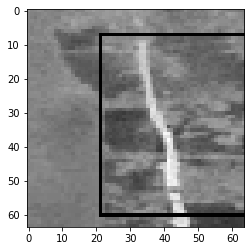

[14.973286628723145, 6.500543594360352, 46.755619049072266, 56.02183532714844]


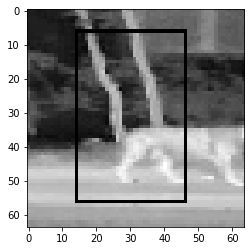

[24.157268524169922, 9.177343368530273, 62.67007064819336, 63.72667694091797]


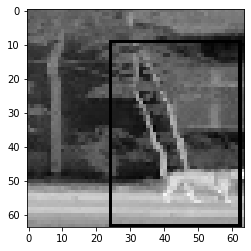

[41.66163635253906, 42.622596740722656, 60.05082702636719, 73.74771881103516]


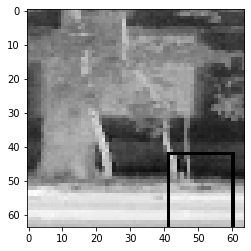

[29.88844108581543, 5.764528274536133, 64.1396484375, 57.126792907714844]


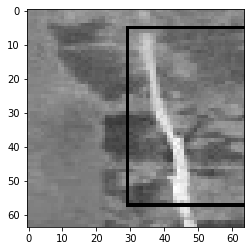

[13.934076309204102, 8.671754837036133, 46.75908660888672, 51.556907653808594]


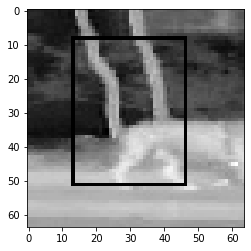

[14.328691482543945, 1.0250682830810547, 50.28846740722656, 52.179405212402344]


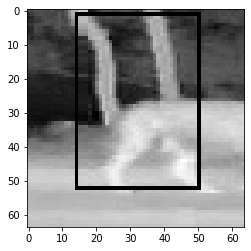

[0.9445266723632812, 12.19460678100586, 25.328649520874023, 55.520694732666016]


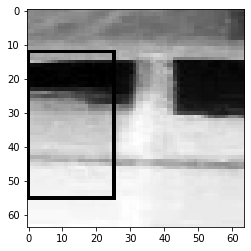

[5.9673919677734375, 3.098236083984375, 56.30146026611328, 58.010498046875]


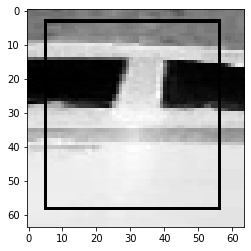

[11.282190322875977, 4.449371337890625, 49.56824493408203, 57.542362213134766]


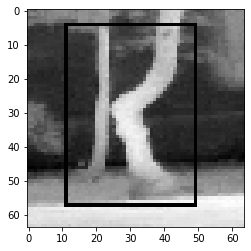

[19.555932998657227, 8.179004669189453, 40.764122009277344, 50.40614318847656]


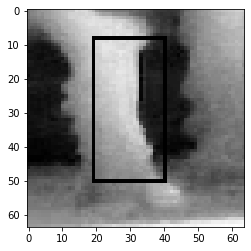

[16.055768966674805, 4.874996185302734, 55.227630615234375, 48.41926193237305]


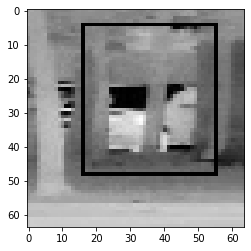

[39.695831298828125, 4.960849761962891, 72.19017791748047, 52.619510650634766]


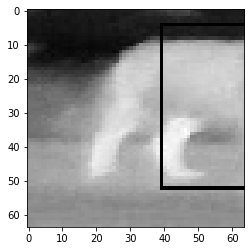

[18.506731033325195, 6.384889602661133, 45.02027893066406, 50.85638427734375]


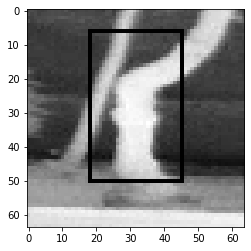

[14.16240119934082, 6.180835723876953, 49.36089324951172, 58.14347457885742]


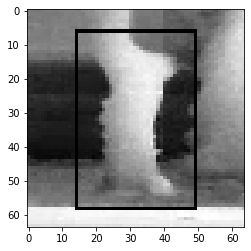

[23.09156608581543, 10.20315170288086, 59.519264221191406, 56.77994918823242]


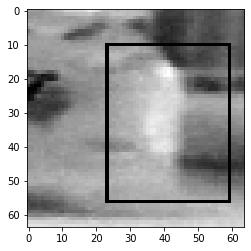

[8.40128231048584, 12.008127212524414, 33.81540298461914, 51.311363220214844]


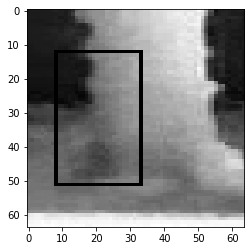

[33.01968002319336, 7.249998092651367, 61.78824234008789, 53.756370544433594]


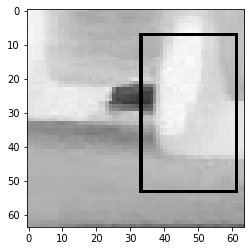

[0.9304256439208984, 23.139909744262695, 21.530019760131836, 60.462928771972656]


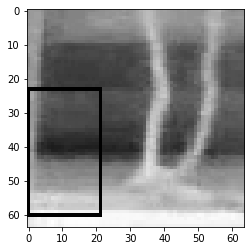

[30.091934204101562, 7.202337265014648, 63.32762145996094, 57.53485107421875]


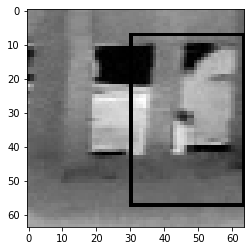

[9.149816513061523, 6.939861297607422, 48.35923767089844, 62.31412887573242]


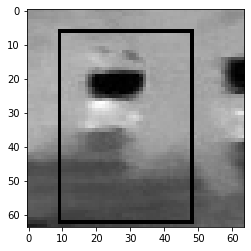

[14.17097282409668, 12.052282333374023, 40.82823944091797, 50.541107177734375]


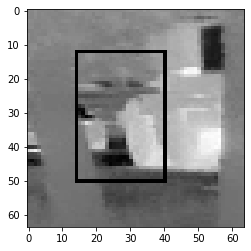

[23.397798538208008, 0.6295948028564453, 64.81940460205078, 55.828857421875]


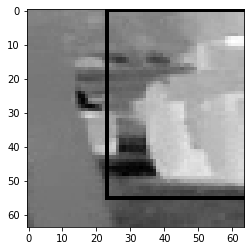

[24.444961547851562, 2.513885498046875, 64.9843978881836, 57.37846755981445]


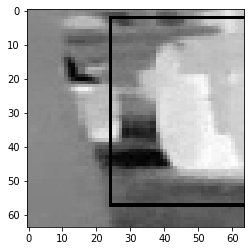

[14.724592208862305, 9.785482406616211, 53.23370361328125, 61.634735107421875]


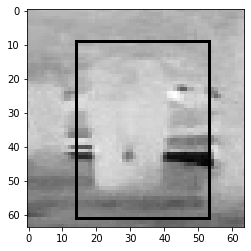

[9.753878593444824, 10.980144500732422, 38.262939453125, 59.59335708618164]


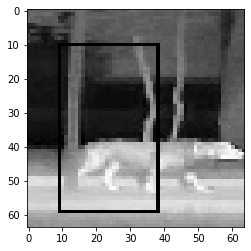

[34.03792953491211, 6.86512565612793, 57.21005630493164, 40.70703125]


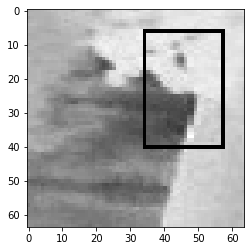

[20.23432731628418, 10.350851058959961, 62.426666259765625, 63.62797546386719]


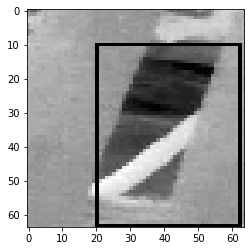

[26.61623764038086, 9.06842041015625, 59.827999114990234, 59.82038879394531]


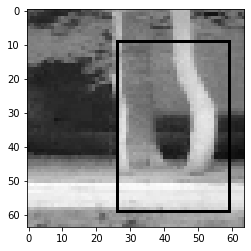

[15.518882751464844, 8.754400253295898, 59.418556213378906, 63.544883728027344]


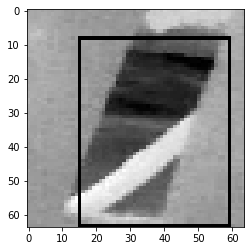

[17.754413604736328, 8.606586456298828, 49.5230827331543, 52.51995849609375]


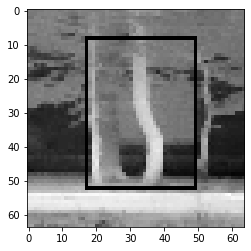

[3.358242988586426, 3.705066680908203, 31.969188690185547, 48.671993255615234]


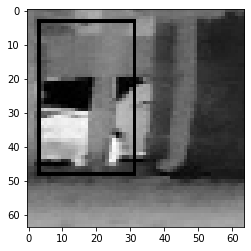

[13.203197479248047, 3.004823684692383, 58.68622970581055, 60.11753845214844]


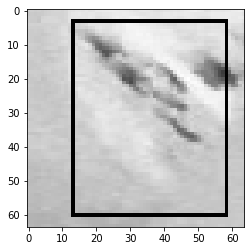

[4.913825988769531, 2.730823516845703, 52.274925231933594, 39.93586349487305]


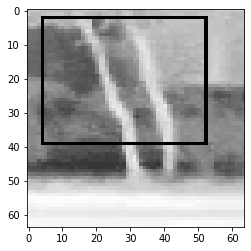

[19.197895050048828, 12.800506591796875, 37.9256591796875, 47.280277252197266]


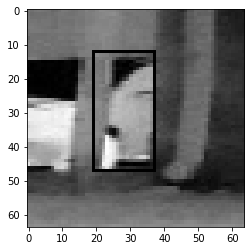

[29.173023223876953, 9.851940155029297, 53.6399040222168, 52.278690338134766]


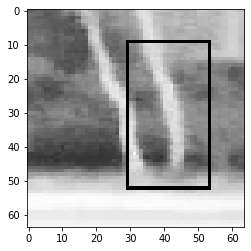

[15.503358840942383, 9.151369094848633, 46.31260681152344, 54.41382598876953]


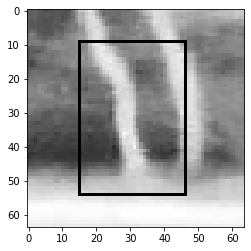

[7.0012969970703125, 3.6637306213378906, 56.721282958984375, 62.30813980102539]


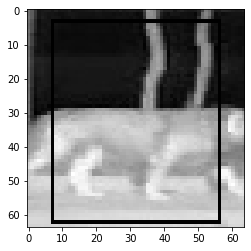

[16.384105682373047, 8.428609848022461, 37.48740768432617, 49.86823272705078]


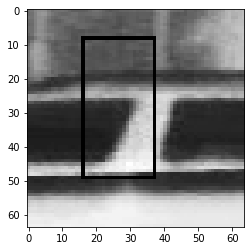

[19.306190490722656, 5.875226974487305, 61.629234313964844, 53.89158630371094]


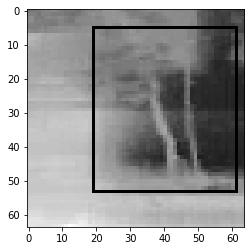

[34.098628997802734, 11.150585174560547, 65.12051391601562, 60.77170181274414]


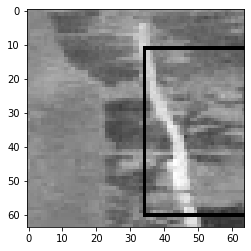

[13.55854606628418, 6.248958587646484, 51.70099639892578, 55.13563919067383]


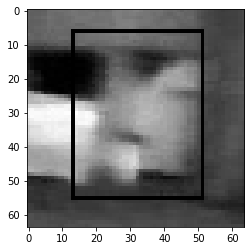

In [28]:
shit = ep1978_bg[ep1978_bg['max_conf'] == 1]
img_dir = 'testing_files\\data\\test_fn_527'
visualise_shit(shit, img_dir)

[-0.6133689880371094, 15.617431640625, 35.30049514770508, 68.72874450683594]


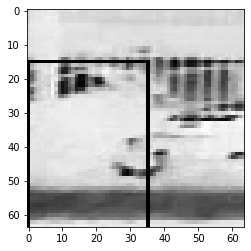

[12.390291213989258, 0.7479114532470703, 46.743263244628906, 49.436546325683594]


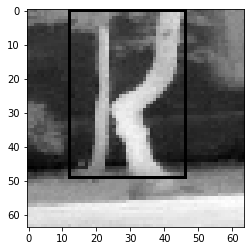

In [29]:
shit = ep154_bg[ep154_bg['max_conf'] == 1]
visualise_shit(shit, img_dir)

[13.622390747070312, 7.801307678222656, 48.98648452758789, 60.318397521972656]


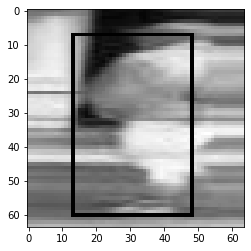

[1.2965936660766602, 0.4856758117675781, 32.317440032958984, 45.874271392822266]


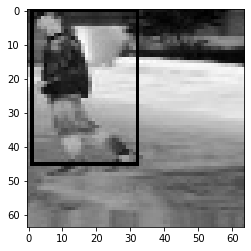

[6.616115570068359, 0.5794467926025391, 54.90437698364258, 56.681068420410156]


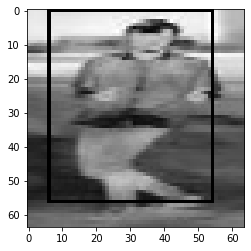

[32.27015686035156, 2.0751895904541016, 56.75440216064453, 41.67799377441406]


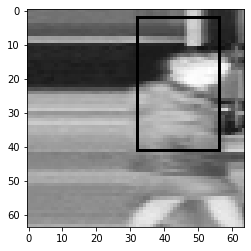

[15.225912094116211, 4.733608245849609, 59.013145446777344, 60.49026870727539]


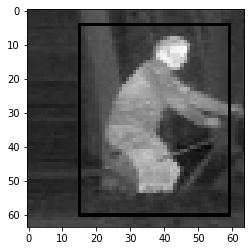

[19.056854248046875, 12.192230224609375, 43.51477813720703, 56.42127990722656]


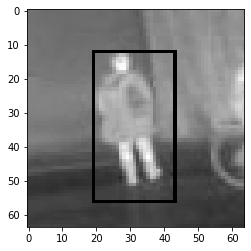

[-0.8565616607666016, -3.194368362426758, 20.900922775268555, 37.23583984375]


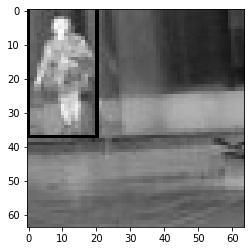

[12.810184478759766, 13.58099365234375, 42.30704879760742, 55.98707580566406]


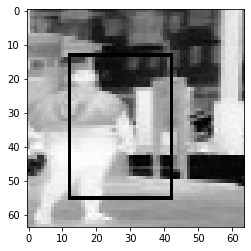

[10.168891906738281, 5.630886077880859, 44.67198181152344, 47.735015869140625]


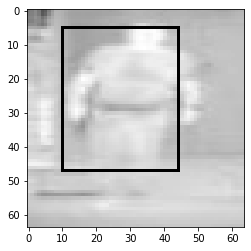

[1.3919649124145508, 8.618340492248535, 21.15581512451172, 35.16576385498047]


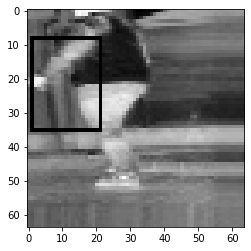

[0.15763092041015625, 3.6959609985351562, 28.424470901489258, 49.759796142578125]


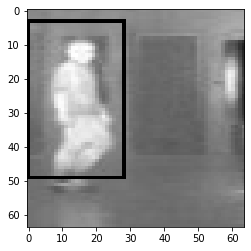

[0.28571510314941406, -0.5160961151123047, 26.60799217224121, 44.673851013183594]


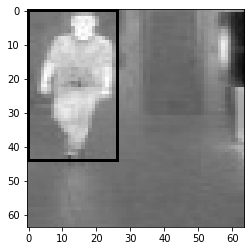

[3.1466474533081055, 2.0742416381835938, 27.170433044433594, 38.63821029663086]


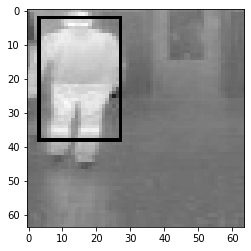

[16.24134063720703, 7.539495468139648, 48.30476379394531, 57.761436462402344]


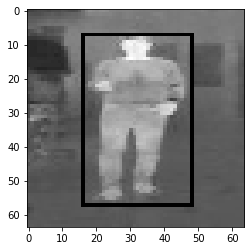

[0.9995861053466797, 7.900112152099609, 34.286277770996094, 57.833194732666016]


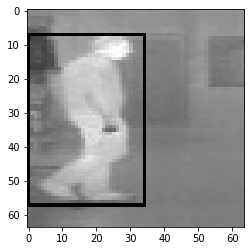

[14.921234130859375, 7.122673034667969, 47.029754638671875, 56.06864929199219]


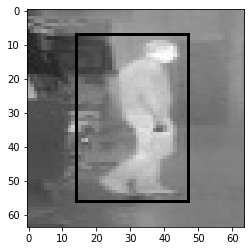

[19.77249526977539, 10.728717803955078, 44.05390548706055, 53.70028305053711]


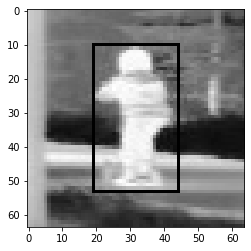

[17.349868774414062, 9.139223098754883, 42.72502136230469, 51.91361999511719]


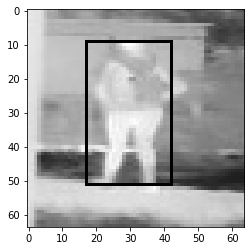

In [30]:
shit = ep154_tp[ep154_tp['max_conf'] != 1]
img_dir = 'testing_files\\data\\test_img_64'
visualise_shit(shit, img_dir)

In [29]:
ep994_bg = pd.read_csv('testing_files\mobnet_64\csv_conf\994\output_994_bg.csv')
ep994_tp = pd.read_csv('testing_files\mobnet_64\csv_conf\994\output_994_tp.csv')

In [31]:
ep994_tp[ep994_tp['iou'] > 0.75]

,Unnamed: 0,img_name,max_conf,iou,box
2,2,102_0_40_3.jpg,1.0,0.897680,"[-0.4580364227294922, 0.5930938720703125, 22.6..."
3,3,106_0_30_0.jpg,1.0,0.857552,"[-1.8139066696166992, 12.789777755737305, 20.0..."
4,4,109_0_40_4.jpg,1.0,0.879669,"[17.544265747070312, 8.476476669311523, 45.796..."
5,5,110_0_40_2.jpg,1.0,0.863911,"[44.11233901977539, -0.5940237045288086, 63.39..."
6,6,110_0_40_4.jpg,1.0,0.962217,"[21.827789306640625, 14.632476806640625, 40.83..."
...,...,...,...,...,...
522,522,v8_4_0_40_2.jpg,1.0,0.878776,"[35.023983001708984, 0.6441917419433594, 63.50..."
523,523,v8_8_0_10_0.jpg,1.0,0.922690,"[7.906036376953125, 3.940450668334961, 54.1269..."
524,524,v8_8_0_30_0.jpg,1.0,0.870735,"[-0.8301544189453125, 6.85106086730957, 32.210..."
525,525,v8_8_0_40_4.jpg,1.0,0.899241,"[16.869441986083984, 8.766977310180664, 45.504..."


In [32]:
328 / 527

0.6223908918406073